## **Cleaning**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df_1 = pd.read_csv('/content/df_1.csv')
df_2 = pd.read_csv('/content/df_2.csv')
df_3 = pd.read_csv('/content/df_3.csv')

# Remove leading or trailing whitespace in column names
df_1.columns = df_1.columns.str.strip()
df_2.columns = df_2.columns.str.strip()
df_3.columns = df_3.columns.str.strip()

In [ ]:
# Reverse scoring for negatively worded questions
df_1['Q7_4'] = 6 - df_1['Q7_4']
df_2['Q10_4'] = 6 - df_2['Q10_4']
df_3['Q13_4'] = 6 - df_3['Q13_4']

**Creating Measures**

## **Dr Pepper - Campaign 1**

In [ ]:
import pandas as pd

df_1 = pd.read_csv('/content/df_1.csv')
# Convert all columns to numeric, setting non-numeric values to NaN
df_1 = df_1.apply(pd.to_numeric, errors='coerce')

# Optionally, drop rows with any NaN values across all columns
df_1 = df_1.dropna()

df_1.head()
df_1.shape
df_1['Q7_4'] = 6 - df_1['Q7_4']
df_1.columns = df_1.columns.str.strip()

In [ ]:
# Brand Perception
df_1['Brand_Perception_Before'] = df_1[['Q1']].mean(axis=1)
df_1['Brand_Perception_After'] = df_1[['Q7_1', 'Q7_3']].mean(axis=1)
df_1['Brand_Perception_Total'] = df_1[['Q1', 'Q7_1', 'Q7_3']].mean(axis=1)

# Purchase Intention
df_1['Purchase_Intention_Before'] = df_1[['Q2']].mean(axis=1)
df_1['Purchase_Intention_After'] = df_1[['Q7_2']].mean(axis=1)
df_1['Purchase_Intention_Total'] = df_1[['Q2', 'Q7_2']].mean(axis=1)

# Perceived Impact of the Campaign
df_1['Perceived_Impact_Before'] = df_1[['Q3', 'Q4', 'Q5', 'Q6']].mean(axis=1)
df_1['Perceived_Impact_After'] = df_1[['Q14', 'Q15', 'Q7_4', 'Q7_5']].mean(axis=1)
df_1['Perceived_Impact_Total'] = df_1[['Q3', 'Q4', 'Q5', 'Q6', 'Q14', 'Q15', 'Q7_4', 'Q7_5']].mean(axis=1)

# Save or inspect the updated dataset
df_1.to_csv("df_1_updated.csv", index=False)
df_1_updated = pd.read_csv('df_1_updated.csv')

**Hypothesis 1**

Paired t-test - campaign 1

In [ ]:
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, t

t_stat, p_value = ttest_rel(
    df_1_updated['Brand_Perception_After'],
    df_1_updated['Brand_Perception_Before']
)

# Calculate the degrees of freedom
n = df_1['Brand_Perception_After'].notna().sum()
df_critical = n - 1  # Degrees of freedom

# Calculate the t-critical value for two-tailed test, alpha=0.05
t_critical = t.ppf(1 - 0.025, df_critical)

# Display the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")
print(f"T-critical (two-tailed, alpha=0.05): {t_critical}")

T-statistic: 3.8432070852634017, P-value: 0.0005864285356533268
T-critical (two-tailed, alpha=0.05): 2.0422724563012373


Bar chart

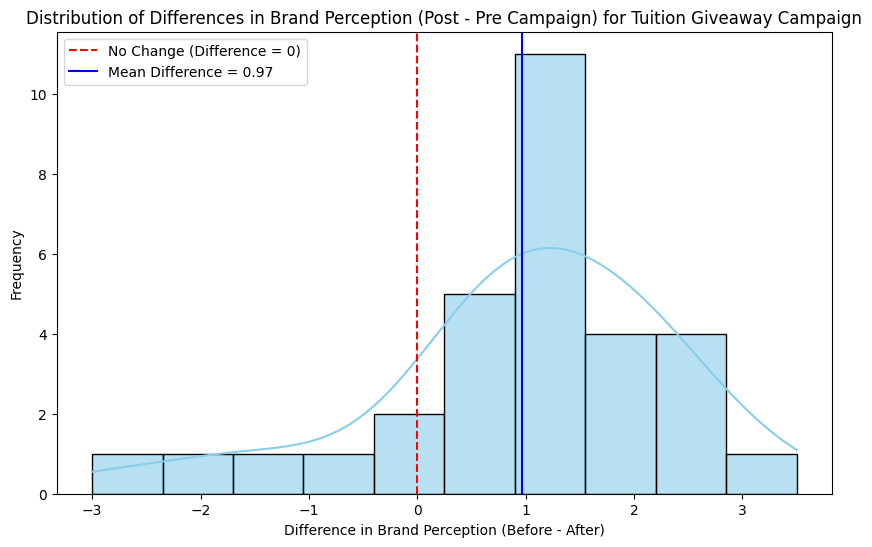

In [ ]:
paired_df_1 = df_1_updated[['Brand_Perception_Before', 'Brand_Perception_After']].dropna()
paired_df_1['difference'] = paired_df_1['Brand_Perception_After'] - paired_df_1['Brand_Perception_Before']
mean_difference_1 = paired_df_1['difference'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(paired_df_1['difference'], bins=10, kde=True, color="skyblue", edgecolor="black", alpha=0.6)
plt.axvline(0, color='red', linestyle='--', label='No Change (Difference = 0)')
plt.axvline(mean_difference_1, color='blue', linestyle='-', label=f'Mean Difference = {mean_difference_1:.2f}')
plt.title('Distribution of Differences in Brand Perception (Post - Pre Campaign) for Tuition Giveaway Campaign')
plt.xlabel('Difference in Brand Perception (Before - After)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Box plot

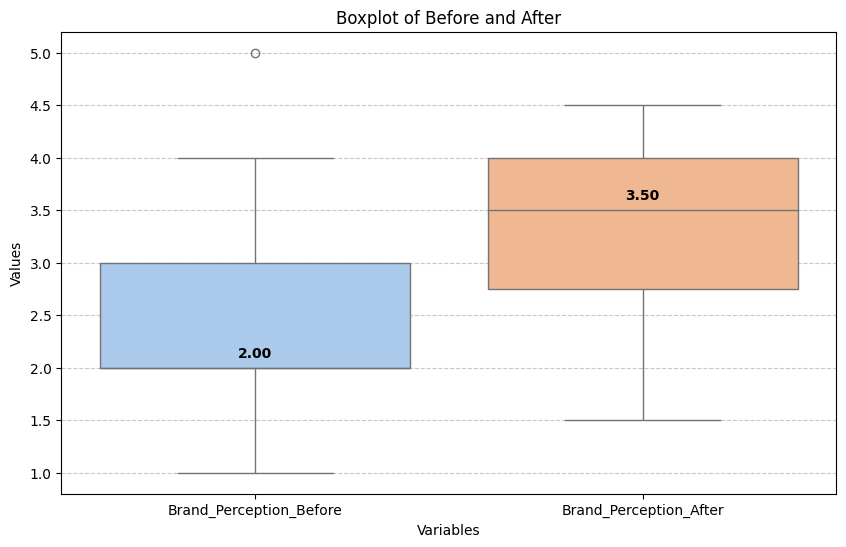

In [ ]:
# Create a boxplot for the variables Q1 and Q7_4
plt.figure(figsize=(10, 6))
sns.boxplot(data=paired_df_1[['Brand_Perception_Before', 'Brand_Perception_After']], palette="pastel")

# Add median lines
medians = paired_df_1[['Brand_Perception_Before', 'Brand_Perception_After']].median()
for i, median in enumerate(medians):
    plt.text(i, median + 0.1, f"{median:.2f}", horizontalalignment='center', color='black', weight='bold')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Boxplot of Before and After')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

**Hypothesis 2**

Correlation matrix

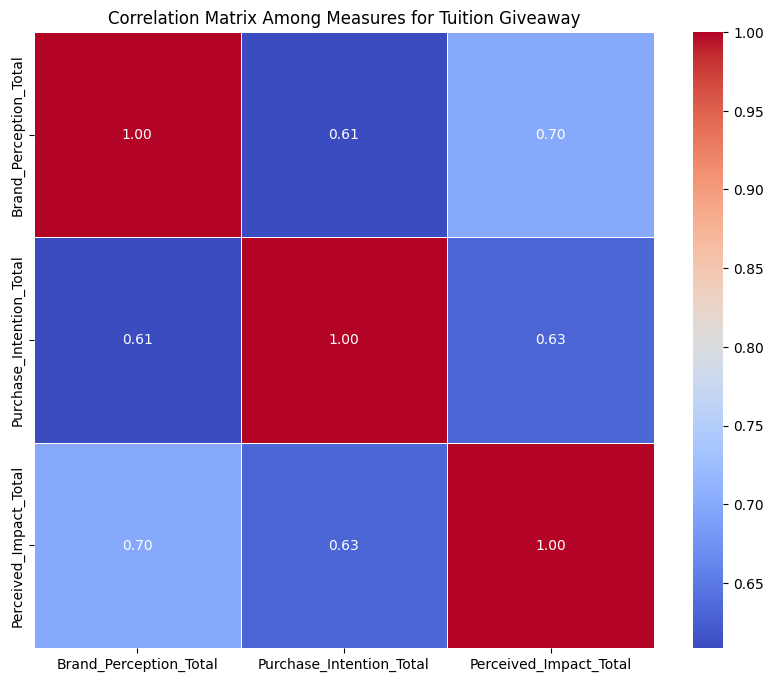

In [ ]:
measures_columns = ['Brand_Perception_Total',
                    'Purchase_Intention_Total',
                    'Perceived_Impact_Total']

# Calculate the correlation matrix among the measures
correlation_matrix_measures = df_1_updated[measures_columns].corr(method='pearson')

# Plot the heatmap for the measures' correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_measures, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Among Measures for Tuition Giveaway")
plt.show()

Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

df_1_updated = pd.read_csv('df_1_updated.csv')

# Define independent variables (X) and dependent variable (y)
X = df_1_updated[['Brand_Perception_Total', 'Perceived_Impact_Total']].dropna()
y = df_1_updated['Purchase_Intention_Total'].dropna()

# Align X and y to include only complete cases
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract model results
coefficients = model.coef_
intercept = model.intercept_
r_squared = model.score(X, y)

# Print the results
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("R-squared:", r_squared)

import statsmodels.api as sm

# Add a constant to the independent variables for the intercept
X_with_constant = sm.add_constant(X)

# Fit the regression model using statsmodels
model_stats = sm.OLS(y, X_with_constant).fit()

# Extract F-value and p-value
f_value = model_stats.fvalue
p_value = model_stats.f_pvalue

print("F-value:", f_value)
print("p-value:", p_value)

Coefficients: [0.50677495 0.6612498 ]
Intercept: -0.2107793065378991
R-squared: 0.45426147909617987
F-value: 11.653310997387576
p-value: 0.00020786651409098803


In [ ]:
from scipy.stats import f

# Calculate degrees of freedom
n = len(y)  # Number of observations
k = X.shape[1]  # Number of predictors (independent variables)
df_regression = k  # Degrees of freedom for the regression (numerator)
df_residual = n - k - 1  # Degrees of freedom for residuals (denominator)

# Calculate F-critical value for two-tailed test at alpha = 0.05
alpha = 0.05
f_critical = f.ppf(1 - alpha, df_regression, df_residual)

# Print F-critical value and compare
print("F-critical:", f_critical)
print("F-value:", f_value)

# Interpretation
if f_value > f_critical:
    print("The F-value is greater than the F-critical value. Reject the null hypothesis.")
else:
    print("The F-value is less than or equal to the F-critical value. Fail to reject the null hypothesis.")

F-critical: 3.340385558237759
F-value: 11.653310997387576
The F-value is greater than the F-critical value. Reject the null hypothesis.


**Hypothesis 3**

In [ ]:
t_stat, p_value = ttest_rel(
    df_1_updated['Perceived_Impact_After'],
    df_1_updated['Perceived_Impact_Before']
)

# Display the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -0.8876943411977273, P-value: 0.3817671099040215


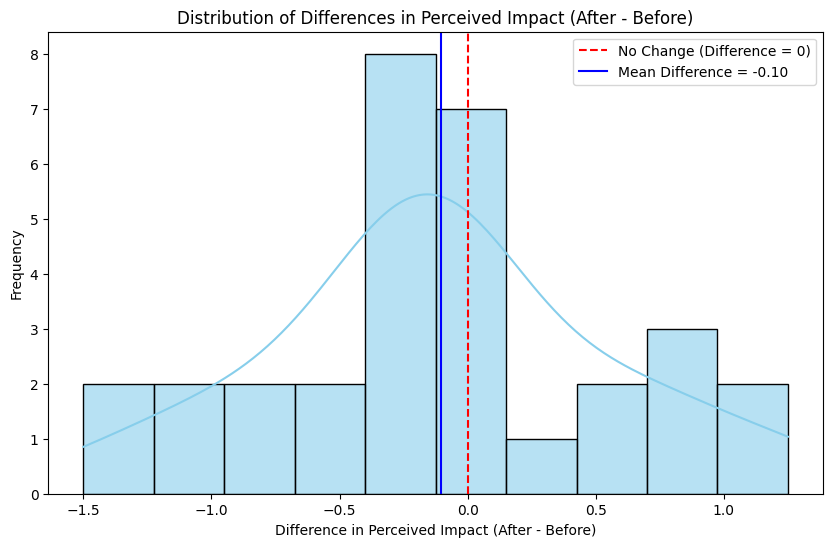

In [ ]:
# Create the paired DataFrame for Perceived Impact Before and After
paired_df_impact = df_1_updated[['Perceived_Impact_Before', 'Perceived_Impact_After']].dropna()
paired_df_impact['difference'] = paired_df_impact['Perceived_Impact_After'] - paired_df_impact['Perceived_Impact_Before']

# Calculate the mean difference
mean_difference_impact = paired_df_impact['difference'].mean()

# Histogram for the differences (After - Before)
plt.figure(figsize=(10, 6))
sns.histplot(paired_df_impact['difference'], bins=10, kde=True, color="skyblue", edgecolor="black", alpha=0.6)
plt.axvline(0, color='red', linestyle='--', label='No Change (Difference = 0)')
plt.axvline(mean_difference_impact, color='blue', linestyle='-', label=f'Mean Difference = {mean_difference_impact:.2f}')
plt.title('Distribution of Differences in Perceived Impact (After - Before)')
plt.xlabel('Difference in Perceived Impact (After - Before)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

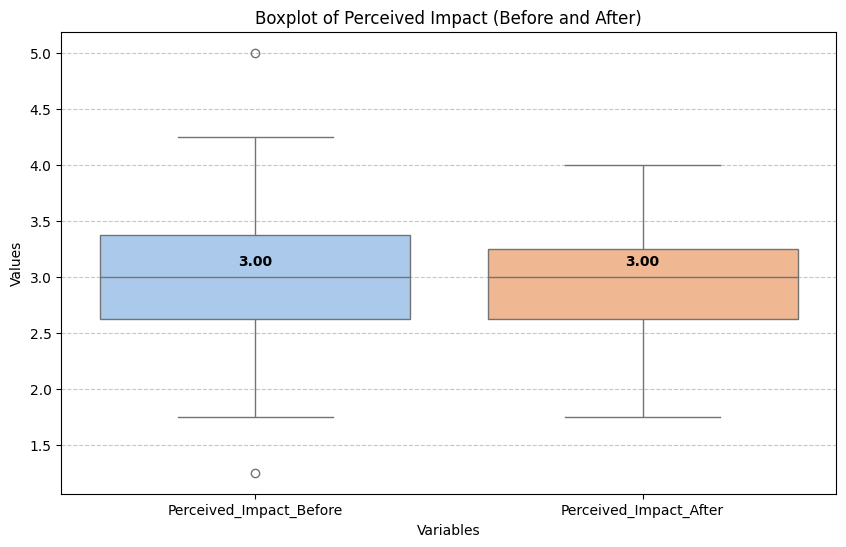

In [ ]:
# Boxplot for Perceived Impact Before and After (Before is first)
plt.figure(figsize=(10, 6))
sns.boxplot(data=paired_df_impact[['Perceived_Impact_Before', 'Perceived_Impact_After']], palette="pastel")

# Add median lines
medians_impact = paired_df_impact[['Perceived_Impact_Before', 'Perceived_Impact_After']].median()
for i, median in enumerate(medians_impact):
    plt.text(i, median + 0.1, f"{median:.2f}", horizontalalignment='center', color='black', weight='bold')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Boxplot of Perceived Impact (Before and After)')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

## **Pepsi - Campaign 2**

In [ ]:
df_2 = pd.read_csv('/content/df_2.csv')
# Convert all columns to numeric, setting non-numeric values to NaN
df_2 = df_2.apply(pd.to_numeric, errors='coerce')

# Optionally, drop rows with any NaN values across all columns
df_2 = df_2.dropna()

df_2.head()
df_2.shape
df_2.columns = df_2.columns.str.strip()

# Brand Perception
df_2['Brand_Perception_Before'] = df_2[['Q1']].mean(axis=1)
df_2['Brand_Perception_After'] = df_2[['Q10_1', 'Q10_3']].mean(axis=1)
df_2['Brand_Perception_Total'] = df_2[['Q1', 'Q10_1', 'Q10_3']].mean(axis=1)

# Purchase Intention
df_2['Purchase_Intention_Before'] = df_2[['Q2']].mean(axis=1)
df_2['Purchase_Intention_After'] = df_2[['Q10_2']].mean(axis=1)
df_2['Purchase_Intention_Total'] = df_2[['Q2', 'Q10_2']].mean(axis=1)

# Perceived Impact of the Campaign
df_2['Perceived_Impact_Before'] = df_2[['Q3', 'Q4', 'Q5', 'Q6']].mean(axis=1)
df_2['Perceived_Impact_After'] = df_2[['Q14', 'Q15', 'Q10_4', 'Q10_5', 'Q10_6']].mean(axis=1)
df_2['Perceived_Impact_Total'] = df_2[['Q3', 'Q4', 'Q5', 'Q6', 'Q14', 'Q15', 'Q10_4', 'Q10_5']].mean(axis=1)

# Save or inspect the updated dataset
df_2.to_csv("df_2_updated.csv", index=False)
df_2_updated = pd.read_csv('df_2_updated.csv')

**Hypothesis 1 Paired t-test**

In [ ]:
# Paired t-test for Brand Perception (df_2)
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns

t_stat, p_value = ttest_rel(
    df_2_updated['Brand_Perception_After'],
    df_2_updated['Brand_Perception_Before']
)

# Display the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 3.009330757747546, P-value: 0.005372561936896103


Bar chart

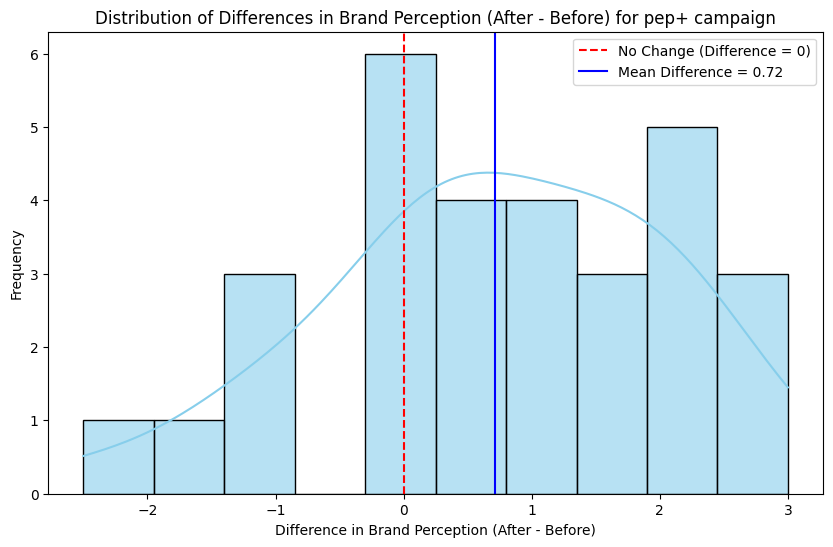

In [ ]:
# Prepare data for Brand Perception Before - After (df_2)
paired_df_2_bp = df_2_updated[['Brand_Perception_Before', 'Brand_Perception_After']].dropna()
paired_df_2_bp['difference'] = paired_df_2_bp['Brand_Perception_After'] - paired_df_2_bp['Brand_Perception_Before']
mean_difference_2_bp = paired_df_2_bp['difference'].mean()

# Histogram of Differences for Brand Perception (df_2)
plt.figure(figsize=(10, 6))
sns.histplot(paired_df_2_bp['difference'], bins=10, kde=True, color="skyblue", edgecolor="black", alpha=0.6)
plt.axvline(0, color='red', linestyle='--', label='No Change (Difference = 0)')
plt.axvline(mean_difference_2_bp, color='blue', linestyle='-', label=f'Mean Difference = {mean_difference_2_bp:.2f}')
plt.title('Distribution of Differences in Brand Perception (After - Before) for pep+ campaign')
plt.xlabel('Difference in Brand Perception (After - Before)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Box plot

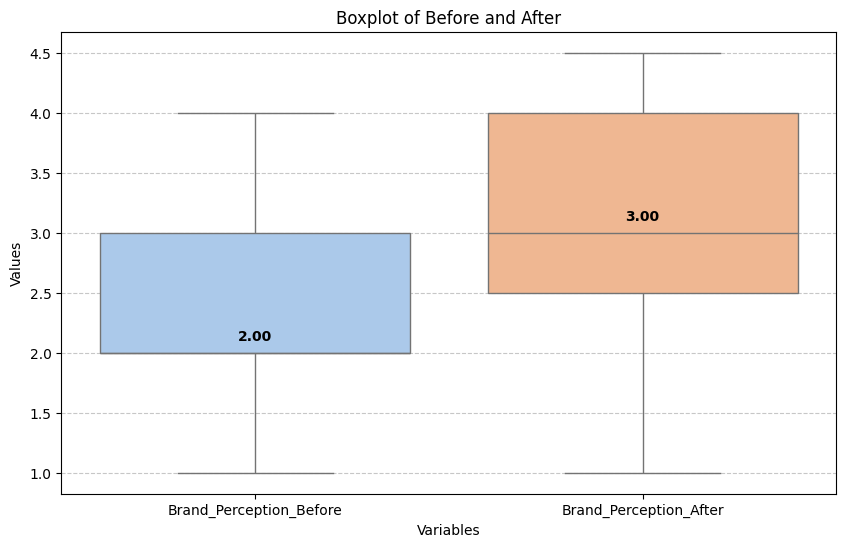

In [ ]:
# Create a boxplot for the variables Q1 and Q7_4
plt.figure(figsize=(10, 6))
sns.boxplot(data=paired_df_2_bp[['Brand_Perception_Before', 'Brand_Perception_After']], palette="pastel")

# Add median lines
medians = paired_df_2_bp[['Brand_Perception_Before', 'Brand_Perception_After']].median()
for i, median in enumerate(medians):
    plt.text(i, median + 0.1, f"{median:.2f}", horizontalalignment='center', color='black', weight='bold')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Boxplot of Before and After')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

**Hypothesis 2**

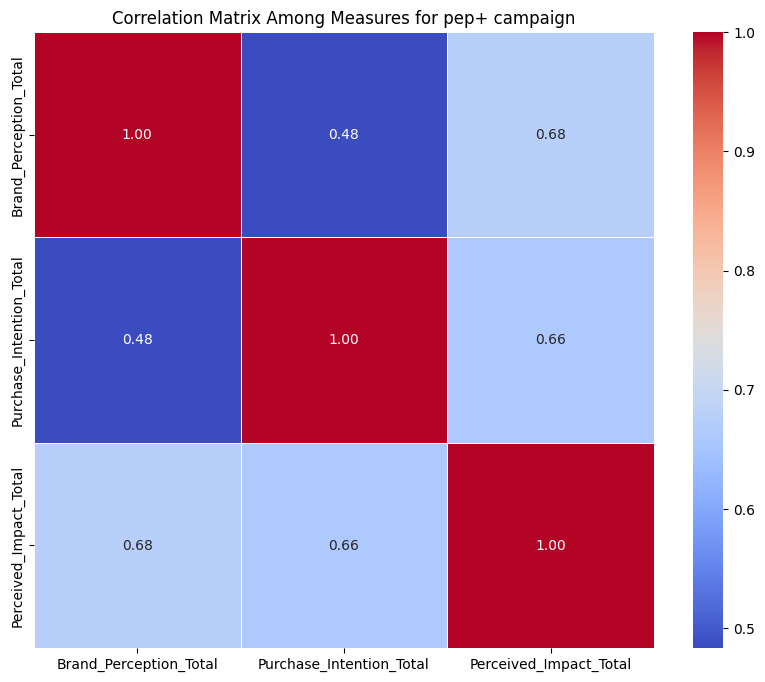

In [ ]:
measures_columns = ['Brand_Perception_Total',
                    'Purchase_Intention_Total',
                    'Perceived_Impact_Total']

# Calculate the correlation matrix among the measures
correlation_matrix_measures = df_2_updated[measures_columns].corr(method='pearson')

# Plot the heatmap for the measures' correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_measures, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Among Measures for pep+ campaign")
plt.show()

Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

# Define independent variables (X) and dependent variable (y)
X = df_2_updated[['Brand_Perception_Total', 'Perceived_Impact_Total']].dropna()
y = df_2_updated['Purchase_Intention_Total'].dropna()

# Align X and y to include only complete cases
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract model results
coefficients = model.coef_
intercept = model.intercept_
r_squared = model.score(X, y)

# Print the results
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("R-squared:", r_squared)

import statsmodels.api as sm

# Add a constant to the independent variables for the intercept
X_with_constant = sm.add_constant(X)

# Fit the regression model using statsmodels
model_stats = sm.OLS(y, X_with_constant).fit()

# Extract F-value and p-value
f_value = model_stats.fvalue
p_value = model_stats.f_pvalue

print("F-value:", f_value)
print("p-value:", p_value)

Coefficients: [0.07879457 0.97589816]
Intercept: -0.0794631893201152
R-squared: 0.43709550528933694
F-value: 10.482753960668044
p-value: 0.00042743361339780375


**Hypothesis 3**

In [ ]:
t_stat, p_value = ttest_rel(
    df_2_updated['Perceived_Impact_After'],
    df_2_updated['Perceived_Impact_Before']
)

# Display the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 0.8174367039575349, P-value: 0.4203443586348913


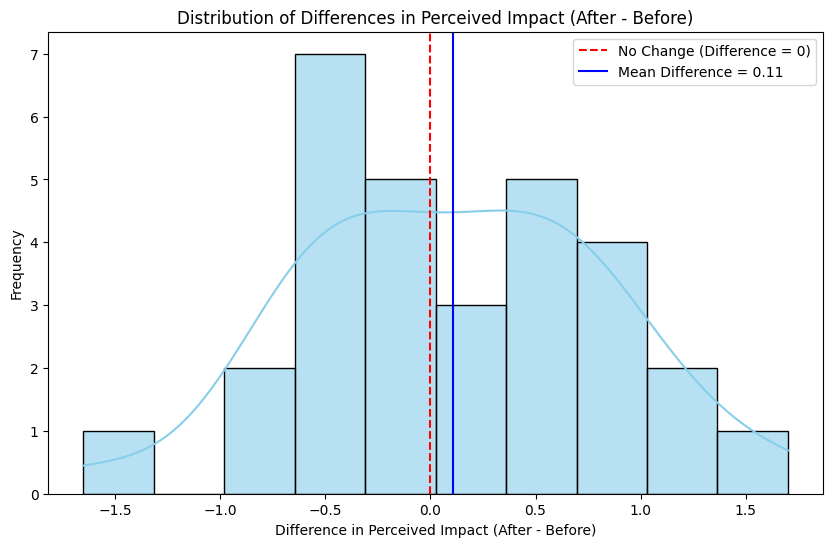

In [ ]:
# Create the paired DataFrame for Perceived Impact Before and After
paired_df_impact = df_2_updated[['Perceived_Impact_Before', 'Perceived_Impact_After']].dropna()
paired_df_impact['difference'] = paired_df_impact['Perceived_Impact_After'] - paired_df_impact['Perceived_Impact_Before']

# Calculate the mean difference
mean_difference_impact = paired_df_impact['difference'].mean()

# Histogram for the differences (Before - After)
plt.figure(figsize=(10, 6))
sns.histplot(paired_df_impact['difference'], bins=10, kde=True, color="skyblue", edgecolor="black", alpha=0.6)
plt.axvline(0, color='red', linestyle='--', label='No Change (Difference = 0)')
plt.axvline(mean_difference_impact, color='blue', linestyle='-', label=f'Mean Difference = {mean_difference_impact:.2f}')
plt.title('Distribution of Differences in Perceived Impact (After - Before)')
plt.xlabel('Difference in Perceived Impact (After - Before)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

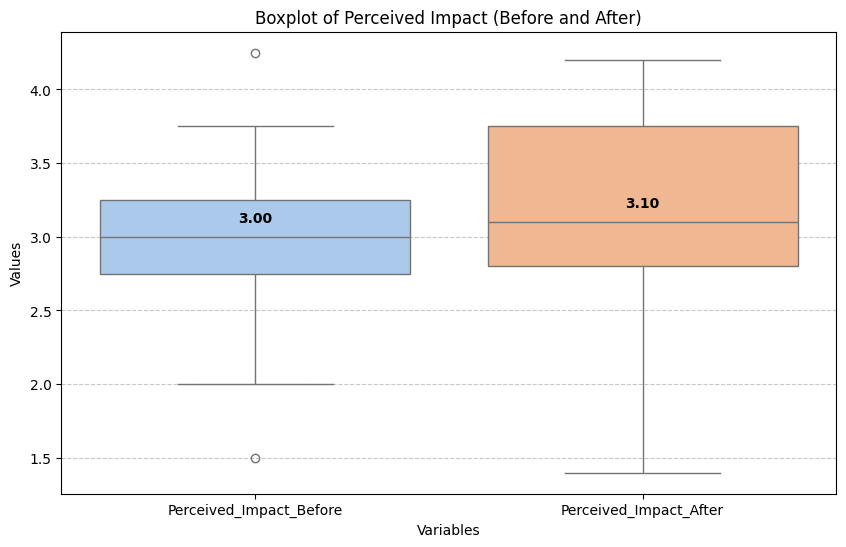

In [ ]:
# Boxplot for Perceived Impact Before and After (Before is first)
plt.figure(figsize=(10, 6))
sns.boxplot(data=paired_df_impact[['Perceived_Impact_Before', 'Perceived_Impact_After']], palette="pastel")

# Add median lines
medians_impact = paired_df_impact[['Perceived_Impact_Before', 'Perceived_Impact_After']].median()
for i, median in enumerate(medians_impact):
    plt.text(i, median + 0.1, f"{median:.2f}", horizontalalignment='center', color='black', weight='bold')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Boxplot of Perceived Impact (Before and After)')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

## **Coca Cola - Campaign 3**

In [ ]:
df_3 = pd.read_csv('/content/df_3.csv')
df_3.head()
df_3.shape

(33, 17)

In [ ]:
df_3.columns = df_3.columns.str.strip()

# Brand Perception
df_3['Brand_Perception_Before'] = df_3[['Q1']].mean(axis=1)
df_3['Brand_Perception_After'] = df_3[['Q13_1', 'Q13_3']].mean(axis=1)
df_3['Brand_Perception_Total'] = df_3[['Q1', 'Q13_1', 'Q13_3']].mean(axis=1)

# Purchase Intention
df_3['Purchase_Intention_Before'] = df_3[['Q2']].mean(axis=1)
df_3['Purchase_Intention_After'] = df_3[['Q13_2']].mean(axis=1)
df_3['Purchase_Intention_Total'] = df_3[['Q2', 'Q13_2']].mean(axis=1)

# Perceived Impact of the Campaign
df_3['Perceived_Impact_Before'] = df_3[['Q3', 'Q4', 'Q5', 'Q6']].mean(axis=1)
df_3['Perceived_Impact_After'] = df_3[['Q14', 'Q15', 'Q13_4', 'Q13_5', 'Q13_6']].mean(axis=1)
df_3['Perceived_Impact_Total'] = df_3[['Q3', 'Q4', 'Q5', 'Q6', 'Q14', 'Q15', 'Q13_4', 'Q13_5']].mean(axis=1)

# Save or inspect the updated dataset
df_3.to_csv("df_3_updated.csv", index=False)
df_3_updated = pd.read_csv('df_3_updated.csv')

**Paired t-test Hypothesis 1**

In [ ]:
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns

t_stat, p_value = ttest_rel(
    df_3_updated['Brand_Perception_After'],
    df_3_updated['Brand_Perception_Before']
)

# Display the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 2.278217291101266, P-value: 0.029531749666340843


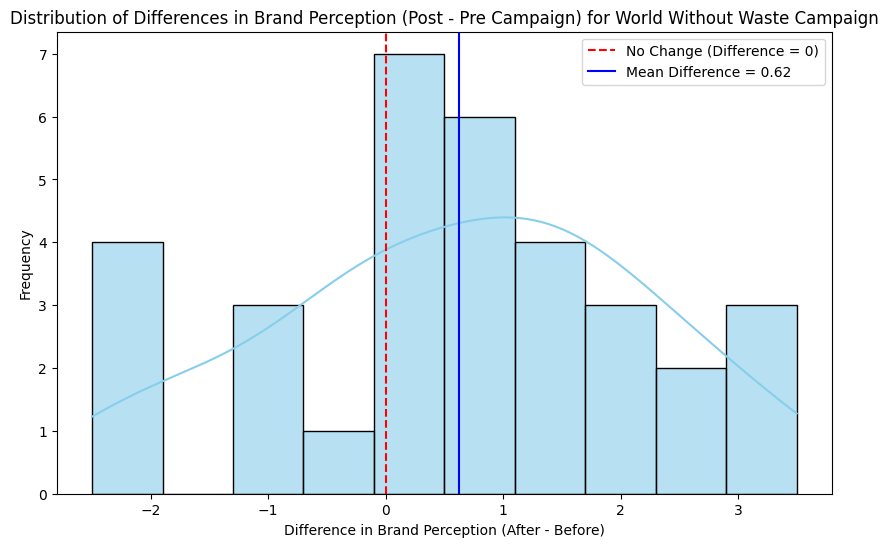

In [ ]:
paired_df_3 = df_3_updated[['Brand_Perception_Before', 'Brand_Perception_After']].dropna()
paired_df_3['difference'] = paired_df_3['Brand_Perception_After'] - paired_df_3['Brand_Perception_Before']
mean_difference_3 = paired_df_3['difference'].mean()

plt.figure(figsize=(10, 6))
sns.histplot(paired_df_3['difference'], bins=10, kde=True, color="skyblue", edgecolor="black", alpha=0.6)
plt.axvline(0, color='red', linestyle='--', label='No Change (Difference = 0)')
plt.axvline(mean_difference_3, color='blue', linestyle='-', label=f'Mean Difference = {mean_difference_3:.2f}')
plt.title('Distribution of Differences in Brand Perception (Post - Pre Campaign) for World Without Waste Campaign')
plt.xlabel('Difference in Brand Perception (After - Before)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

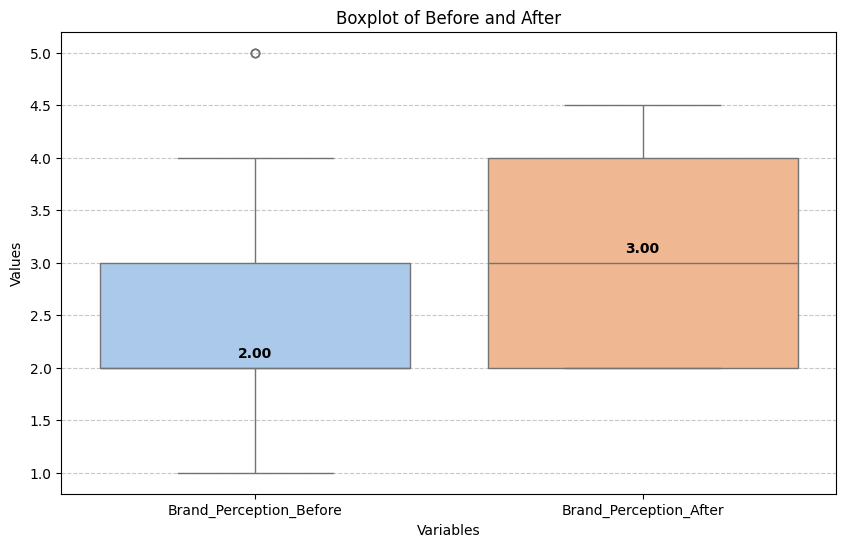

In [ ]:
# Create a boxplot for the variables Before and After
plt.figure(figsize=(10, 6))
sns.boxplot(data=paired_df_3[['Brand_Perception_Before', 'Brand_Perception_After']], palette="pastel")

# Add median lines
medians = paired_df_3[['Brand_Perception_Before', 'Brand_Perception_After']].median()
for i, median in enumerate(medians):
    plt.text(i, median + 0.1, f"{median:.2f}", horizontalalignment='center', color='black', weight='bold')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Boxplot of Before and After')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

**Hypothesis 2**

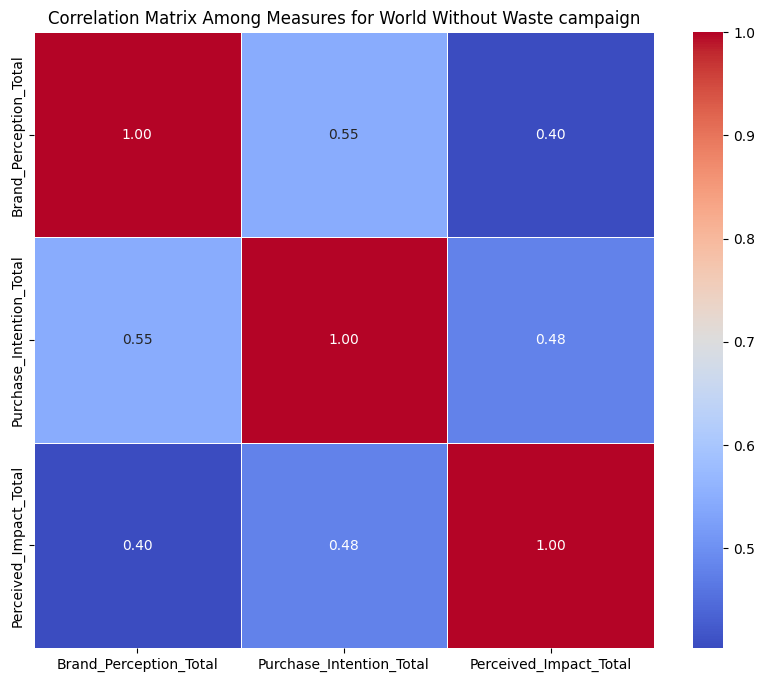

In [ ]:
measures_columns = ['Brand_Perception_Total',
                    'Purchase_Intention_Total',
                    'Perceived_Impact_Total']

# Calculate the correlation matrix among the measures
correlation_matrix_measures = df_3_updated[measures_columns].corr(method='pearson')

# Plot the heatmap for the measures' correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_measures, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Among Measures for World Without Waste campaign")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Define independent variables (X) and dependent variable (y)
X = df_3_updated[['Brand_Perception_Total', 'Perceived_Impact_Total']].dropna()
y = df_3_updated['Purchase_Intention_Total'].dropna()

# Align X and y to include only complete cases
common_index = X.index.intersection(y.index)
X = X.loc[common_index]
y = y.loc[common_index]

# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract model results
coefficients = model.coef_
intercept = model.intercept_
r_squared = model.score(X, y)

# Print the results
print("Coefficients:", coefficients)
print("Intercept:", intercept)
print("R-squared:", r_squared)

# Add a constant to the independent variables for the intercept
X_with_constant = sm.add_constant(X)

# Fit the regression model using statsmodels
model_stats = sm.OLS(y, X_with_constant).fit()

# Extract F-value and p-value
f_value = model_stats.fvalue
p_value = model_stats.f_pvalue

print("F-value:", f_value)
print("p-value:", p_value)

Coefficients: [0.67247833 0.68993903]
Intercept: -0.9435983844828031
R-squared: 0.3785315321688574
F-value: 9.136381452060427
p-value: 0.0007966846939138758


**Hypothesis 3**

In [ ]:
t_stat, p_value = ttest_rel(
    df_3_updated['Perceived_Impact_After'],
    df_3_updated['Perceived_Impact_Before']
)

# Display the results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 3.420975894820308, P-value: 0.0017231695293974736


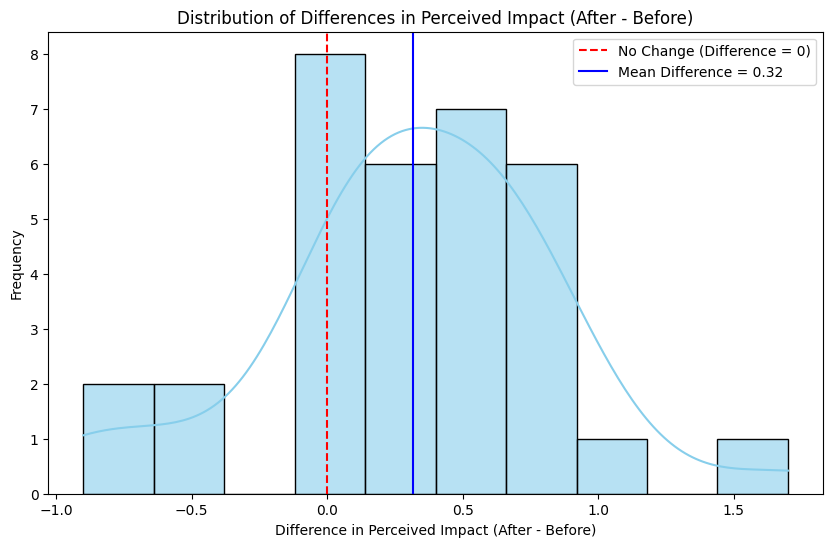

In [ ]:
# Create the paired DataFrame for Perceived Impact Before and After
paired_df_impact = df_3_updated[['Perceived_Impact_Before', 'Perceived_Impact_After']].dropna()
paired_df_impact['difference'] = paired_df_impact['Perceived_Impact_After'] - paired_df_impact['Perceived_Impact_Before']

# Calculate the mean difference
mean_difference_impact = paired_df_impact['difference'].mean()

# Histogram for the differences (After - Before)
plt.figure(figsize=(10, 6))
sns.histplot(paired_df_impact['difference'], bins=10, kde=True, color="skyblue", edgecolor="black", alpha=0.6)
plt.axvline(0, color='red', linestyle='--', label='No Change (Difference = 0)')
plt.axvline(mean_difference_impact, color='blue', linestyle='-', label=f'Mean Difference = {mean_difference_impact:.2f}')
plt.title('Distribution of Differences in Perceived Impact (After - Before)')
plt.xlabel('Difference in Perceived Impact (After - Before)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

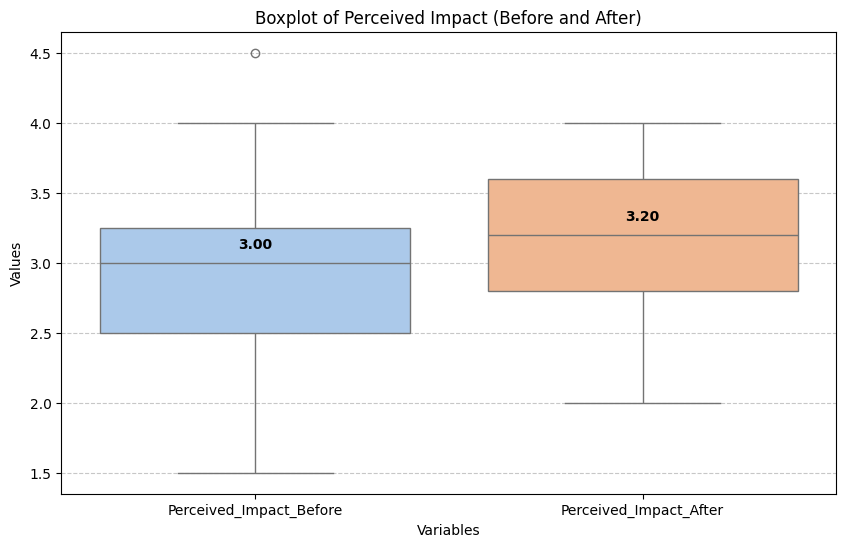

In [ ]:
# Boxplot for Perceived Impact Before and After (Before is first)
plt.figure(figsize=(10, 6))
sns.boxplot(data=paired_df_impact[['Perceived_Impact_Before', 'Perceived_Impact_After']], palette="pastel")

# Add median lines
medians_impact = paired_df_impact[['Perceived_Impact_Before', 'Perceived_Impact_After']].median()
for i, median in enumerate(medians_impact):
    plt.text(i, median + 0.1, f"{median:.2f}", horizontalalignment='center', color='black', weight='bold')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title('Boxplot of Perceived Impact (Before and After)')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

# **ANOVA**

ANOVA for Brand Perception Total

In [ ]:
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

# ANOVA for Brand Perception Total
f_stat_bp, p_value_bp = f_oneway(df_1['Brand_Perception_Total'], df_2['Brand_Perception_Total'], df_3['Brand_Perception_Total'])
print("ANOVA for Brand Perception Total:")
print(f"F-statistic: {f_stat_bp}, p-value: {p_value_bp}")
print("-" * 40)

ANOVA for Brand Perception Total:
F-statistic: 0.012271503799946694, p-value: 0.9878051184088185
----------------------------------------


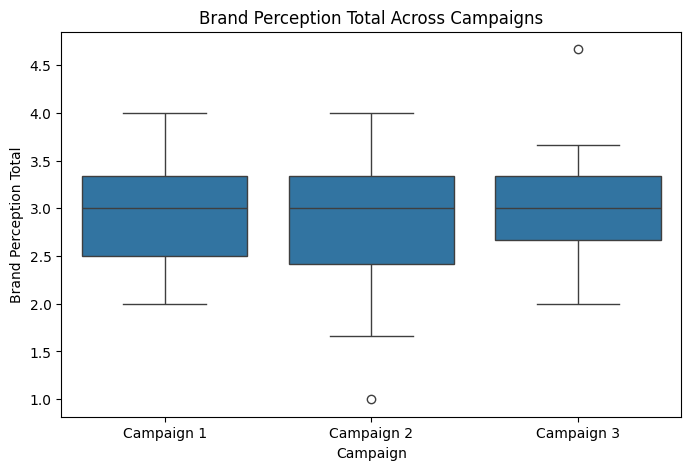

In [ ]:
# Combine data into one DataFrame
combined_data_1 = pd.concat([
    pd.DataFrame({'Campaign': 'Campaign 1', 'Brand_Perception_Total': df_1_updated['Brand_Perception_Total']}),
    pd.DataFrame({'Campaign': 'Campaign 2', 'Brand_Perception_Total': df_2_updated['Brand_Perception_Total']}),
    pd.DataFrame({'Campaign': 'Campaign 3', 'Brand_Perception_Total': df_3_updated['Brand_Perception_Total']})
])

# Plot the boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Campaign', y='Brand_Perception_Total', data=combined_data_1)
plt.title('Brand Perception Total Across Campaigns')
plt.ylabel('Brand Perception Total')
plt.xlabel('Campaign')
plt.show()

ANOVA for Purchase Intention Total

In [ ]:
# ANOVA for Purchase Intention Total
f_stat_pi, p_value_pi = f_oneway(df_1_updated['Purchase_Intention_Total'], df_2_updated['Purchase_Intention_Total'], df_3_updated['Purchase_Intention_Total'])
print("ANOVA for Purchase Intention Total:")
print(f"F-statistic: {f_stat_pi}, p-value: {p_value_pi}")
print("-" * 40)

ANOVA for Purchase Intention Total:
F-statistic: 0.06018508816754335, p-value: 0.94162768786354
----------------------------------------


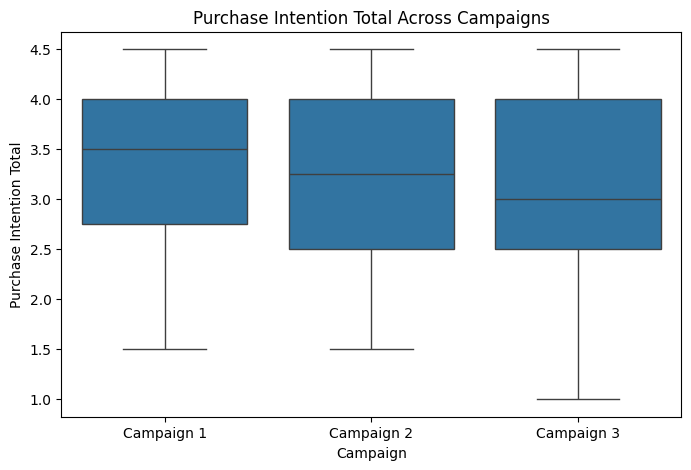

In [ ]:
# Combine data into one DataFrame for Purchase Intention
combined_data_2 = pd.concat([
    pd.DataFrame({'Campaign': 'Campaign 1', 'Purchase_Intention_Total': df_1_updated['Purchase_Intention_Total']}),
    pd.DataFrame({'Campaign': 'Campaign 2', 'Purchase_Intention_Total': df_2_updated['Purchase_Intention_Total']}),
    pd.DataFrame({'Campaign': 'Campaign 3', 'Purchase_Intention_Total': df_3_updated['Purchase_Intention_Total']})
])

# Plot the boxplot for Purchase Intention
plt.figure(figsize=(8, 5))
sns.boxplot(x='Campaign', y='Purchase_Intention_Total', data=combined_data_2)
plt.title('Purchase Intention Total Across Campaigns')
plt.ylabel('Purchase Intention Total')
plt.xlabel('Campaign')
plt.show()

ANOVA for Perceived Impact Total

In [ ]:
f_stat_pi, p_value_pi = f_oneway(df_1_updated['Perceived_Impact_Total'], df_2_updated['Perceived_Impact_Total'], df_3_updated['Perceived_Impact_Total'])
print("ANOVA for Perceived Impact Total:")
print(f"F-statistic: {f_stat_pi}, p-value: {p_value_pi}")
print("-" * 40)

ANOVA for Perceived Impact Total:
F-statistic: 0.7477403226753586, p-value: 0.4763212817130128
----------------------------------------


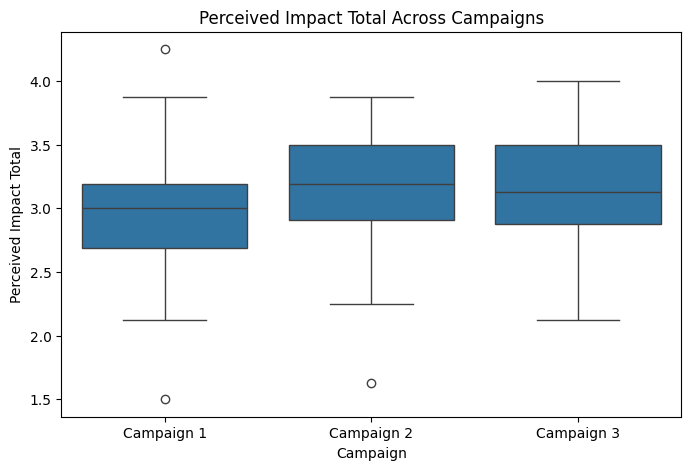

In [ ]:
# Combine data into one DataFrame for Perceived Impact
combined_data_3 = pd.concat([
    pd.DataFrame({'Campaign': 'Campaign 1', 'Perceived_Impact_Total': df_1_updated['Perceived_Impact_Total']}),
    pd.DataFrame({'Campaign': 'Campaign 2', 'Perceived_Impact_Total': df_2_updated['Perceived_Impact_Total']}),
    pd.DataFrame({'Campaign': 'Campaign 3', 'Perceived_Impact_Total': df_3_updated['Perceived_Impact_Total']})
])

# Plot the boxplot for Perceived Impact
plt.figure(figsize=(8, 5))
sns.boxplot(x='Campaign', y='Perceived_Impact_Total', data=combined_data_3)
plt.title('Perceived Impact Total Across Campaigns')
plt.ylabel('Perceived Impact Total')
plt.xlabel('Campaign')
plt.show()

In [ ]:
from scipy.stats import f

# Sample sizes (replace with actual counts if needed)
n1 = len(df_1)  # Sample size for Campaign 1
n2 = len(df_2)  # Sample size for Campaign 2
n3 = len(df_3)  # Sample size for Campaign 3

# Degrees of freedom
num_groups = 3  # Number of campaigns
df_between = num_groups - 1  # Numerator degrees of freedom
df_within = (n1 + n2 + n3) - num_groups  # Denominator degrees of freedom

# Significance level (alpha)
alpha = 0.05

# F-critical value
f_critical = f.ppf(1 - alpha, df_between, df_within)
print("F-critical value:", f_critical)



F-critical value: 3.0965526714962603


In [17]:
!git clone https://<your-username>:<your-token>@github.com/RomanKrishtal/Cause-marketing-analysis.git
%cd Cause-marketing-analysis

/bin/bash: line 1: your-username: No such file or directory
[Errno 2] No such file or directory: 'Cause-marketing-analysis'
/content/Cause-marketing-analysis/Cause-marketing-analysis
